# 2021 Intro. to Machine Learning 
## Program Assignment #3 - K-means Clustering


### 0816153 陳琮方

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Data Input

使用一般的讀檔方法，將資料讀進來，用 numpy array 的資料型態。

In [2]:
raw_data_path = './Dataset/seeds_dataset.txt'

with open(raw_data_path, 'r') as f:
    raw_data = np.array([[float(attr) for attr in line.split()] for line in f.readlines()])
    
print(raw_data.shape)

(210, 8)


## Data Preprocessing

設定 K-means 的最深程度，以防沒有收斂然後重複太深。
將資料做 shuffle ，並將 Label 從 X 拉離，設為 Y。

In [3]:
MAX_DEPTH = 20

In [4]:
np.random.shuffle(raw_data) 

X = np.delete(raw_data, -1, axis = 1)
Y = raw_data[:, -1:]
Y = Y.astype(int)
Y = Y.flatten()
Y = Y.tolist()

print(f'X Shape = {X.shape}')
print(f'Y Shape = {len(Y)} * 1')

X Shape = (210, 7)
Y Shape = 210 * 1


## K-means Clustering 

K-mean 的 function ，並將分群做 Majority ，看原本的 Group

In [5]:
def kmeans(X, num_clusters):

    num_feat = len(X[1])
    max_dept = MAX_DEPTH

    np.random.seed(59487)

    # Init
    group_info = np.random.randint(num_clusters, size = X.shape[0])
    group_mean = np.zeros([num_clusters, num_feat])
    datas_grop = [[] for i in range(num_clusters)]

#     print(f'Start K-means: {num_clusters}')
    
    for i, j in zip(X, group_info):
        datas_grop[j].append(i)

    for i in range(num_clusters):
        group_mean[i] = np.mean(datas_grop[i], axis = 0)

    INF = 2147483647
    delta = 0
    dep = 0
    while True:
        dep += 1
        for i in range(X.shape[0]):
            now_grp = group_info[i]
            nxt_grp = now_grp
            dis_min = INF
            for j in range(num_clusters):
                tmp_dis = np.sqrt(np.power(X[i] - group_mean[j], 2).sum())
                if tmp_dis < dis_min:
                    dis_min = tmp_dis
                    nxt_grp = j
            
            delta += (now_grp != nxt_grp)
            group_info[i] = nxt_grp
        
        # Recalculate mean
        group_mean = np.zeros([num_clusters, num_feat])    
        datas_grop = [[] for i in range(num_clusters)]

        for i, j in zip(X, group_info):
            datas_grop[j].append(i)

        for i in range(num_clusters):
            group_mean[i] = np.mean(datas_grop[i], axis = 0)
            
        if dep >= max_dept or delta < 1e-5:
            return [group_info, group_mean]

            
    return [group_info, group_mean]

In [6]:
group_info, _ = kmeans(X, 3)

nums = [{ 1: 0, 2:0, 3:0 } for i in range(3)]

p = 0
for i in group_info:
    nums[i][Y[p]] += 1
    p += 1

gp_to_key = {}
for i in range(3):
    gp_to_key[i] = max(nums[i], key=nums[i].get)
    
print(gp_to_key)

{0: 2, 1: 1, 2: 3}


## Results

使用 Sklearn 的 function ，去算四個數值。

In [7]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score

def getResult(y_test, y_pred):
    ret = {}
    
    ret['Accuracy'] = round(accuracy_score(y_test, y_pred), 4) * 100
    ret['Recall'] = np.round(recall_score(y_test, y_pred, average=None), 2)
    ret['Precision'] = np.round(precision_score(y_test, y_pred, average=None), 2)
    ret['Confusion Matrix'] = confusion_matrix(y_test, y_pred)
    
    return ret

predict_y = [gp_to_key[i] for i in group_info]

result = {}
result['K-means'] = getResult(Y, predict_y)

pd.options.display.max_colwidth = 80
df = pd.DataFrame.from_dict(result, orient = 'index')
df

,Accuracy,Recall,Precision,Confusion Matrix
K-means,89.52,"[0.86, 0.86, 0.97]","[0.83, 0.98, 0.88]","[[60, 1, 9], [10, 60, 0], [2, 0, 68]]"


## Question - K-means Visulization
#### Choose two features to execute your K-means function and draw a scatter plot with the computed centers and the predicted label for each instance

這邊使用 feature 6 and 7 去做 k-means, 紅點為 center。

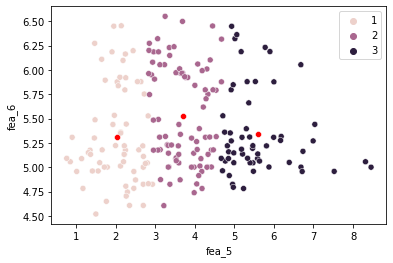

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

now_X = X[:, 5:7]
now_Y = Y

group_info, group_mean = kmeans(now_X, 3)

nums = [{ 1: 0, 2:0, 3:0 } for i in range(3)]
p = 0
for i in group_info:
    nums[i][Y[p]] += 1
    p += 1
gp_to_key = {}
for i in range(3):
    gp_to_key[i] = max(nums[i], key=nums[i].get)
    
now_X = pd.DataFrame(now_X)
now_X.columns = ['fea_5', 'fea_6']
now_Y = pd.DataFrame([gp_to_key[i] for i in group_info])
now_Y.columns = ['lable']

data_all = pd.concat([now_X, now_Y], axis = 1)
data_men = pd.DataFrame(group_mean)
data_men.columns = ['x', 'y']

ax = sns.scatterplot(data = data_all, x = 'fea_5', y = 'fea_6', hue = 'lable')
ax = sns.scatterplot(data = data_men, x = 'x', y = 'y', color = 'red', ax=ax)

# 2021 Intro. to Machine Learning 
## Program Assignment #3 - Support Vector Machine


### 0816153 陳琮方

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Data Input

使用 Pandas 將資料讀成 DataFrame

In [2]:
raw_data_path = './Dataset/ionosphere.data'

raw_data = pd.read_csv(raw_data_path, header = None)

print(f'Data Shape = {raw_data.shape}')

Data Shape = (351, 35)


## Data Preprocessing

將 Label 拉出來行成 Y，同時先將資料做 shuffle 。

In [3]:
# Shuffle
raw_data = raw_data.sample(frac=1).reset_index(drop=True)

print(f'Dataset size = {raw_data.shape}\n')

X = raw_data.iloc[:, :-1]
Y = raw_data.iloc[:, -1:]

print(f'X size: {X.shape}')
print(f'Y size: {Y.shape}')

Dataset size = (351, 35)

X size: (351, 34)
Y size: (351, 1)


### Holdout validation

本題採用 Hold-Validation ，我使用 sklearn 的 ```train_test_split```

In [4]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                        X, Y, test_size=0.30, shuffle=True, random_state=50)

## Support Vector Machine

### Parameter Search

這裡使用 sklearn 中的 GridSearchCV ，同時測試哪個參數設定比較好，也有 cross-validation ，並讓 clf 最後為效果最好的那一個 model 。

下面有三總不同的 kernel 測試結果的表格，已經照 rank_test_score 排序。

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters_lin = { }
parameters_pol = { 'degree' : [2, 5, 8], 'gamma' : [1.0, 3.0], 'coef0' : [0.0, 2.0] }
parameters_gam = { 'gamma' : [1.0, 3.0]}

clf_lin = GridSearchCV(SVC(kernel = 'linear'), parameters_lin, cv = 5)
clf_pol = GridSearchCV(SVC(kernel = 'poly')  , parameters_pol, cv = 5)
clf_rbf = GridSearchCV(SVC(kernel = 'rbf')   , parameters_gam, cv = 5)

clf_lin.fit(X_train, Y_train)
clf_pol.fit(X_train, Y_train)
clf_rbf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'gamma': [1.0, 3.0]})

#### Linear

In [6]:
df = pd.DataFrame(clf_lin.cv_results_)
df = df[[
    'mean_test_score', 'split0_test_score',
    'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'rank_test_score'
]].sort_values(by=['rank_test_score'])
df

,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,rank_test_score
0,0.853061,0.877551,0.857143,0.836735,0.816327,0.877551,1


#### Polynomial

In [7]:
df = pd.DataFrame(clf_pol.cv_results_)
df = df[[
    'mean_test_score', 'param_coef0', 'param_degree', 'param_gamma', 'split0_test_score',
    'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'rank_test_score'
]].sort_values(by=['rank_test_score'])
df

,mean_test_score,param_coef0,param_degree,param_gamma,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,rank_test_score
0,0.865306,0.0,2,1.0,0.877551,0.857143,0.857143,0.795918,0.938776,1
6,0.861224,2.0,2,1.0,0.877551,0.836735,0.857143,0.795918,0.938776,2
1,0.840816,0.0,2,3.0,0.775510,0.836735,0.836735,0.857143,0.897959,3
8,0.828571,2.0,5,1.0,0.816327,0.836735,0.816327,0.795918,0.877551,4
7,0.828571,2.0,2,3.0,0.775510,0.836735,0.836735,0.836735,0.857143,5
9,0.820408,2.0,5,3.0,0.795918,0.795918,0.816327,0.816327,0.877551,6
3,0.812245,0.0,5,3.0,0.816327,0.755102,0.816327,0.795918,0.877551,7
10,0.812245,2.0,8,1.0,0.795918,0.755102,0.816327,0.795918,0.897959,7
11,0.812245,2.0,8,3.0,0.795918,0.775510,0.775510,0.795918,0.918367,7
2,0.808163,0.0,5,1.0,0.816327,0.734694,0.816327,0.795918,0.877551,10


#### RBF

In [8]:
df = pd.DataFrame(clf_rbf.cv_results_)
df = df[[
    'mean_test_score', 'param_gamma', 'split0_test_score',
    'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'rank_test_score'
]].sort_values(by=['rank_test_score'])
df

,mean_test_score,param_gamma,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,rank_test_score
0,0.906122,1.0,0.979592,0.897959,0.836735,0.918367,0.897959,1
1,0.885714,3.0,0.938776,0.897959,0.795918,0.897959,0.897959,2


### Result

這裡也使用 sklearn 的 function 去算不同 model 的表現，最後整理成表格。

In [9]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score

def getResult(y_test, y_pred):
    ret = {}
    
    ret['Accuracy'] = round(accuracy_score(y_test, y_pred), 4) * 100
    ret['Recall'] = np.round(recall_score(y_test, y_pred, average=None), 2)
    ret['Precision'] = np.round(precision_score(y_test, y_pred, average=None), 2)
    ret['Confusion Matrix'] = confusion_matrix(y_test, y_pred)
    
    return ret

In [10]:
result = {}

result['Linear'] = getResult(Y_test, clf_lin.predict(X_test))
result['RBF'] = getResult(Y_test, clf_rbf.predict(X_test))
result['Polynomial'] = getResult(Y_test, clf_pol.predict(X_test))

df = pd.DataFrame.from_dict(result, orient = 'index')
df

,Accuracy,Recall,Precision,Confusion Matrix
Linear,90.57,"[0.71, 1.0]","[1.0, 0.88]","[[24, 10], [0, 72]]"
RBF,91.51,"[0.97, 0.89]","[0.8, 0.98]","[[33, 1], [8, 64]]"
Polynomial,91.51,"[0.79, 0.97]","[0.93, 0.91]","[[27, 7], [2, 70]]"


## Question
### Show the average performance of K-fold cross-validation of parameter search in tables for each kernel

The result showed in upper cells which are in "Parameter Search" section.
Which is called 'mean_test_score' column.